<a href="https://colab.research.google.com/github/skhetrapal/chaotic_pde_fno/blob/main/ks_fno2d_spectral_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
import warnings

warnings.filterwarnings('ignore')

def is_running_on_colab():
    return 'COLAB_GPU' in os.environ

# Use the function to check
if is_running_on_colab():
    print("This notebook is running on Google Colab.")

    # Mount your Google Drive.
    drive.mount("/content/drive")


This notebook is running on Google Colab.
Mounted at /content/drive


In [ ]:
!pip install dgl -f https://data.dgl.ai/wheels/torch-2.4/cu121/repo.html

Looking in links: https://data.dgl.ai/wheels/torch-2.4/cu121/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab data/FNO2d_module')

from fno2d import FNO2d
from utils import utilities, transforms
from dataloader import *
from loader_2d import *
from utils.utilities import set_seed
import argparse

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
#########################################################################

##################### Load test data #############################

PATH = '/content/drive/MyDrive/Colab data/FNO2d_module/kuramoto_sivashinsky_data_128.npy'
training_data_resolution = 128
grid_size = 128
batch_size = 20
ntrain = 80
nval = 20
ntest = 20

loader = npzloader(path=PATH)

x_train, y_train, x_val, y_val, x_test, y_test = loader.split(ntrain, nval, ntest)

x_normalizer = utilities.UnitGaussianNormalizer(x_train)
y_normalizer = utilities.UnitGaussianNormalizer(y_train)

test_obj = DataLoader_2D(X=x_test, y=y_test, n=ntest, res=training_data_resolution, \
                           grid_size=grid_size, batch_size=batch_size, x_normalizer=x_normalizer)
test_grid_loader = test_obj.get_grid_loader()


In [ ]:
# Load the trained model's state dictionary
model_path = '/content/drive/MyDrive/Colab data/FNO2d_KS_data/model_m12_w64.pt'  # Replace with the actual path
state_dict = torch.load(model_path)

# Create an instance of the model
#from fno2d import FNO2d
model12 = FNO2d(modes1=12, modes2=12, width=64)

# Load the state dictionary into the model
model12.load_state_dict(state_dict)

# Set the model to evaluation mode
model12.eval()


# Get a batch of data from the test set
for batch in test_grid_loader:
    x, y = batch
    break

# Perform inference
with torch.no_grad():
    output12 = model12(x)

# Example: Print the output shape
print("Output shape:", output12.shape)

Output shape: torch.Size([20, 128, 128, 1])


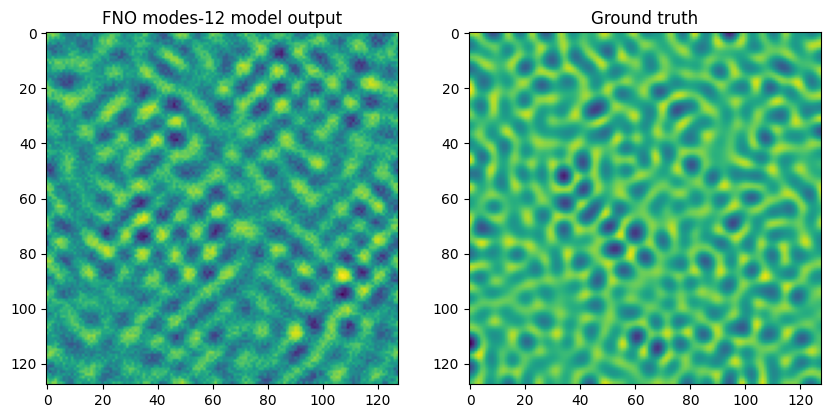

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have 'output' from the model and 'y' from the test data

# Assuming output and y are tensors of shape (batch_size, channels, height, width)
# Let's plot the first image from the batch

output_image12 = output12[0, :, :, 0].cpu().numpy()  # Assuming single channel output
y_image = y[0, 0, :, :].cpu().numpy()  # Assuming single channel ground truth

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the model's output
axes[0].imshow(output_image12)
axes[0].set_title("FNO modes-12 model output")

# Plot the ground truth
axes[1].imshow(y_image)
axes[1].set_title("Ground truth")

plt.show()


In [ ]:
# Load the trained model's state dictionary
model_path = '/content/drive/MyDrive/Colab data/FNO2d_KS_data/model_m24_w64.pt'  # Replace with the actual path
state_dict = torch.load(model_path)

# Create an instance of the model

model24 = FNO2d(modes1=24, modes2=24, width=64)

# Load the state dictionary into the model
model24.load_state_dict(state_dict)

# Set the model to evaluation mode
model24.eval()

# Get a batch of data from the test set
for batch in test_grid_loader:
    x, y = batch
    break

# Perform inference
with torch.no_grad():
    output24 = model24(x)

# Example: Print the output shape
print("Output shape:", output24.shape)

Output shape: torch.Size([20, 128, 128, 1])


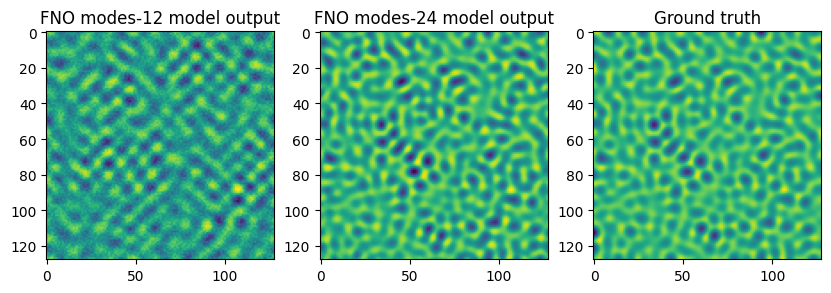

In [ ]:
# Assuming you have 'output' from the model and 'y' from the test data
# Assuming output and y are tensors of shape (batch_size, channels, height, width)
# Let's plot the first image from the batch

# Plot the model's output

output_image24 = output24[0, :, :, 0].cpu().numpy()  # Assuming single channel output
y_image = y[0, 0, :, :].cpu().numpy()  # Assuming single channel ground truth

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))


axes[0].imshow(output_image12)
axes[0].set_title("FNO modes-12 model output")


# Plot the model's output
axes[1].imshow(output_image24)
axes[1].set_title("FNO modes-24 model output")

# Plot the ground truth
axes[2].imshow(y_image)
axes[2].set_title("Ground truth")

plt.show()


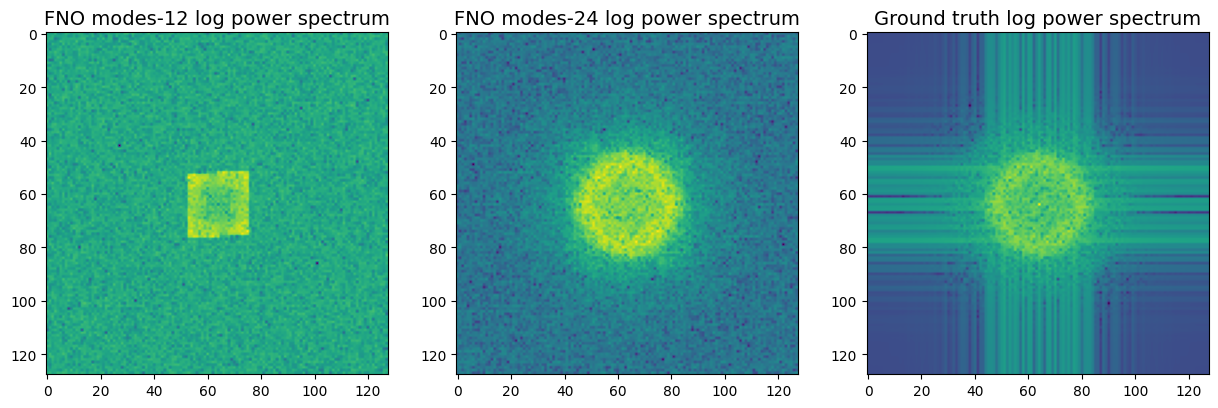

(128, 128)


In [ ]:
######### Performing spectral analysis on output12 output24 and y to obtain 2d log power ###################

import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

# Assuming output12, output24, and y are tensors of shape (batch_size, channels, height, width)
# Let's perform spectral analysis on the first image from the batch

output12_image = output12[0, :, :, 0].cpu().numpy()
output24_image = output24[0, :, :, 0].cpu().numpy()
y_image = y[0, 0, :, :].cpu().numpy()

# Perform 2D FFT
output12_fft = fftpack.fft2(output12_image)
output24_fft = fftpack.fft2(output24_image)
y_fft = fftpack.fft2(y_image)

# Shift zero frequency component to the center of the spectrum
output12_fft_shift = fftpack.fftshift(output12_fft)
output24_fft_shift = fftpack.fftshift(output24_fft)
y_fft_shift = fftpack.fftshift(y_fft)

# Calculate the power spectrum (magnitude squared)
output12_power_spectrum = np.abs(output12_fft_shift) ** 2
output24_power_spectrum = np.abs(output24_fft_shift) ** 2
y_power_spectrum = np.abs(y_fft_shift) ** 2

# Plot the power spectra
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(np.log(output12_power_spectrum))
axes[0].set_title("FNO modes-12 log power spectrum",fontsize = "14")

axes[1].imshow(np.log(output24_power_spectrum))
axes[1].set_title("FNO modes-24 log power spectrum",fontsize = "14")

axes[2].imshow(np.log(y_power_spectrum))
axes[2].set_title("Ground truth log power spectrum",fontsize = "14")

plt.show()

print(output12_power_spectrum.shape)

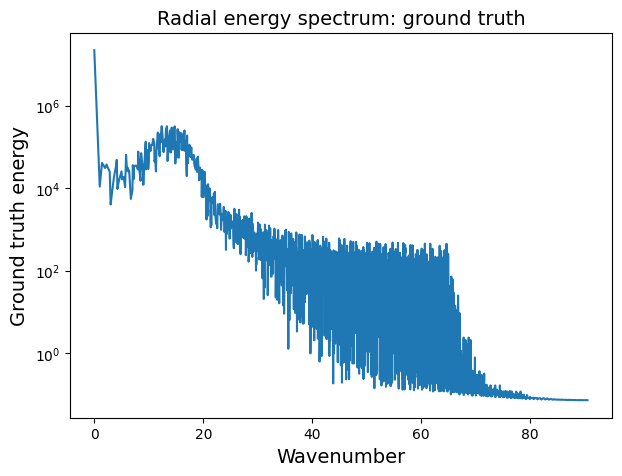

In [ ]:
#################### Plot radial energy spectrum of ground truth ###################

# Assuming output12_power_spectrum, output24_power_spectrum, and y_power_spectrum are already calculated

# Calculate the radial wavenumber
def radial_wavenumber(shape):
  rows, cols = shape
  row_indices = np.arange(rows) - rows // 2
  col_indices = np.arange(cols) - cols // 2
  row_indices_mesh, col_indices_mesh = np.meshgrid(row_indices, col_indices)
  radial_k = np.sqrt(row_indices_mesh**2 + col_indices_mesh**2)
  return radial_k

radial_k = radial_wavenumber(output12_power_spectrum.shape)

# Average the power spectrum along the radial wavenumber
def radial_average(spectrum, radial_k):
  unique_k_values = np.unique(radial_k)
  radial_avg_spectrum = []
  for k_value in unique_k_values:
    mask = radial_k == k_value
    avg_power = np.mean(spectrum[mask])
    radial_avg_spectrum.append(avg_power)
  return np.array(radial_avg_spectrum), unique_k_values

avg_y_spectrum, _ = radial_average(y_power_spectrum, radial_k)
abs_avg_y_spectrum = np.abs(avg_y_spectrum)

# Plot the absolute energy in groung truth vs wavenumber
plt.figure(figsize=(7, 5))
plt.plot(unique_k_values, abs_avg_y_spectrum, label = "Ground truth")
plt.xlabel("Wavenumber", fontsize = "14")
plt.ylabel("Ground truth energy", fontsize = "14")
plt.title("Radial energy spectrum: ground truth", fontsize = "14")
plt.yscale('log')
plt.show()


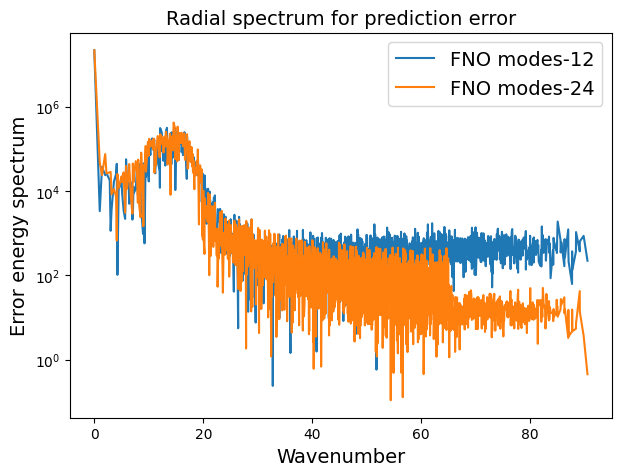

In [ ]:
#################### Plot prediction error radial energy spectrum ###################


avg_output12_spectrum, unique_k_values = radial_average(output12_power_spectrum, radial_k)
avg_output24_spectrum, _ = radial_average(output24_power_spectrum, radial_k)

# Calculate the absolute difference in energy of 'output' vs 'ground truth'
energy_diff_output12 = np.abs(avg_output12_spectrum - avg_y_spectrum)
energy_diff_output24 = np.abs(avg_output24_spectrum - avg_y_spectrum)

# Plot the absolute energy difference vs wavenumber
plt.figure(figsize=(7, 5))
plt.plot(unique_k_values, energy_diff_output12, label="FNO modes-12")
plt.plot(unique_k_values, energy_diff_output24, label="FNO modes-24")
plt.xlabel("Wavenumber",fontsize = "14")
plt.ylabel("Error energy spectrum",fontsize = "14")
plt.title("Radial spectrum for prediction error",fontsize = "14")
plt.legend(fontsize = "14")
plt.yscale('log')
plt.show()

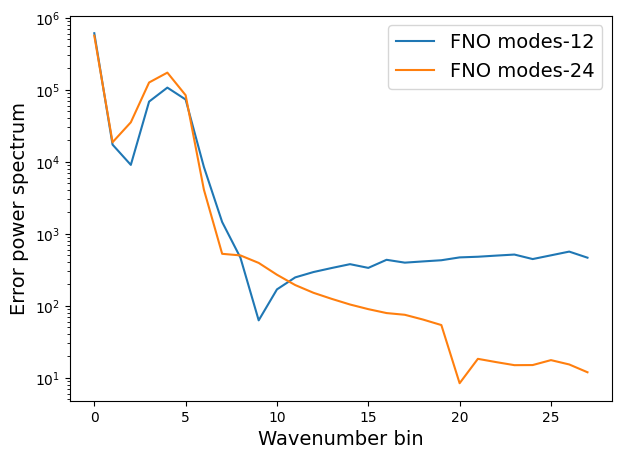

In [ ]:
######## Binned prediction error radial power spectrum ###############

# Calculate the radial wavenumber
def radial_wavenumber(shape):
  rows, cols = shape
  row_indices = np.arange(rows) - rows // 2
  col_indices = np.arange(cols) - cols // 2
  row_indices_mesh, col_indices_mesh = np.meshgrid(row_indices, col_indices)
  radial_k = np.sqrt(row_indices_mesh**2 + col_indices_mesh**2)
  return radial_k

radial_k = radial_wavenumber(output12_power_spectrum.shape)

# Number of bins
num_bins = 28

# Find the maximum radial wavenumber
max_k = np.max(radial_k)

# Create bins for radial wavenumbers
bin_edges = np.linspace(0, max_k, num_bins + 1)

# Assign each radial wavenumber to its corresponding bin
bin_indices = np.digitize(radial_k, bin_edges) - 1

# Average the power spectrum along the radial wavenumber bins
def binned_average(spectrum, bin_indices):
  binned_avg_spectrum = []
  for bin_index in range(num_bins):
    mask = bin_indices == bin_index
    if np.any(mask):
      avg_power = np.mean(spectrum[mask])
      binned_avg_spectrum.append(avg_power)
    else:
      binned_avg_spectrum.append(0)  # Or handle empty bins differently
  return np.array(binned_avg_spectrum)

avg_output12_spectrum = binned_average(output12_power_spectrum, bin_indices)
avg_output24_spectrum = binned_average(output24_power_spectrum, bin_indices)
avg_y_spectrum = binned_average(y_power_spectrum, bin_indices)

# Calculate the absolute difference in energy
energy_diff_output12 = np.abs(avg_output12_spectrum - avg_y_spectrum)
energy_diff_output24 = np.abs(avg_output24_spectrum - avg_y_spectrum)

# Plot the absolute energy difference vs wavenumber
plt.figure(figsize=(7, 5))
plt.plot(np.arange(num_bins), energy_diff_output12, label="FNO modes-12")
plt.plot(np.arange(num_bins), energy_diff_output24, label="FNO modes-24")
plt.xlabel("Wavenumber bin",fontsize = "14")
plt.ylabel("Error power spectrum",fontsize = "14")
#plt.title("Radial spectrum for prediction error vs wavenumber")
plt.legend(fontsize = "14")
plt.yscale('log')
plt.show()


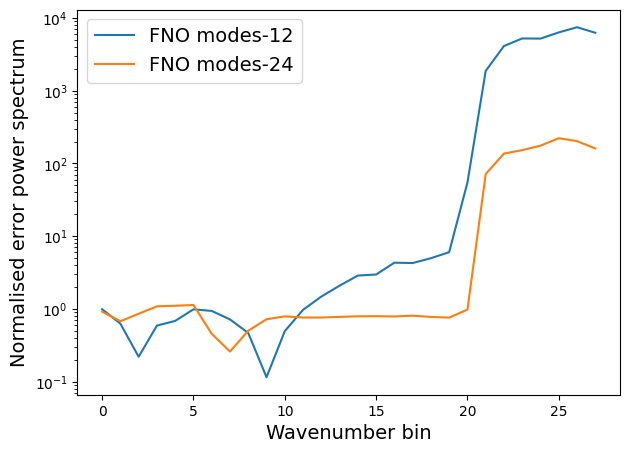

In [ ]:
######## Normalised prediction error radial power spectrum ###############


# Calculate the absolute difference in energy
norm_energy_diff_output12 = np.abs(energy_diff_output12/avg_y_spectrum)
norm_energy_diff_output24 = np.abs(energy_diff_output24/avg_y_spectrum)

# Plot the absolute energy difference vs wavenumber
plt.figure(figsize=(7, 5))
plt.plot(np.arange(num_bins), norm_energy_diff_output12, label="FNO modes-12")
plt.plot(np.arange(num_bins), norm_energy_diff_output24, label="FNO modes-24")
plt.xlabel("Wavenumber bin",fontsize = "14")
plt.ylabel("Normalised error power spectrum",fontsize = "14")
plt.legend(fontsize = "14")
plt.yscale('log')
plt.show()
